In [7]:
#Load Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, RMSprop, Adamax
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [9]:
#matplotlib inline
dataset=pd.read_csv('./heart.csv')
dataset.head(8)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [10]:
#Creating Dummy Variables
chest_pain=pd.get_dummies(dataset['cp'],prefix='cp',drop_first=True)
dataset=pd.concat([dataset,chest_pain],axis=1)
dataset.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(dataset['slope'],prefix='slope')
th=pd.get_dummies(dataset['thal'],prefix='thal')
rest_ecg=pd.get_dummies(dataset['restecg'],prefix='restecg')
frames=[dataset,sp,th,rest_ecg]
dataset=pd.concat(frames,axis=1)
dataset.drop(['slope','thal','restecg'],axis=1,inplace=True)
dataset.head(8)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0
5,57,1,140,192,0,148,0,0.4,0,1,...,0,1,0,0,1,0,0,0,1,0
6,56,0,140,294,0,153,0,1.3,0,1,...,0,1,0,0,0,1,0,1,0,0
7,44,1,120,263,0,173,0,0.0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [11]:
#Defining trainingset
X = dataset.drop(['target'], axis = 1)
y = dataset.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
conclusion = []

optimizers_list = [[Adagrad,0.01,0.02,0.03], 
                   [SGD,0.01,0.02,0.03], 
                   [Adam,0.001,0.002,0.003],
                   [RMSprop,0.001,0.002,0.003],
                   [Adamax,0.002,0.003,0.004]
                  ]
optimizers_name = ["Adagrad", "SGD", "Adam", "RMSprop", "Adamax"]

['Adagrad', 0.01] accuracy of the model:  0.8032786885245902
['Adagrad', 0.02] accuracy of the model:  0.8524590163934426
['Adagrad', 0.03] accuracy of the model:  0.9180327868852459
['SGD', 0.01] accuracy of the model:  0.8524590163934426
['SGD', 0.02] accuracy of the model:  0.8688524590163934
['SGD', 0.03] accuracy of the model:  0.9016393442622951
['Adam', 0.001] accuracy of the model:  0.8360655737704918
['Adam', 0.002] accuracy of the model:  0.8032786885245902
['Adam', 0.003] accuracy of the model:  0.8524590163934426
['RMSprop', 0.001] accuracy of the model:  0.8524590163934426
['RMSprop', 0.002] accuracy of the model:  0.8360655737704918
['RMSprop', 0.003] accuracy of the model:  0.819672131147541
['Adamax', 0.002] accuracy of the model:  0.9016393442622951
['Adamax', 0.003] accuracy of the model:  0.8360655737704918
['Adamax', 0.004] accuracy of the model:  0.8032786885245902


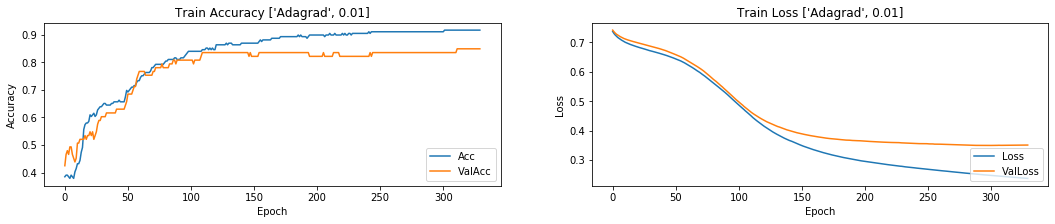

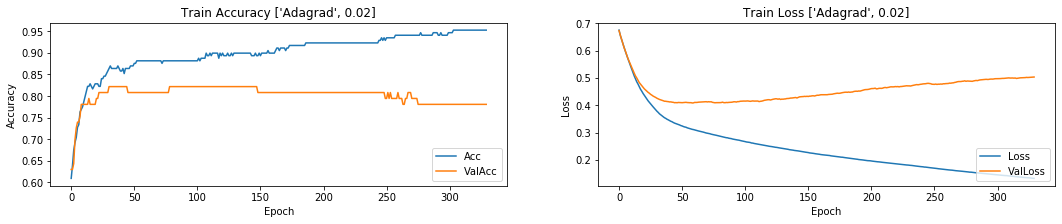

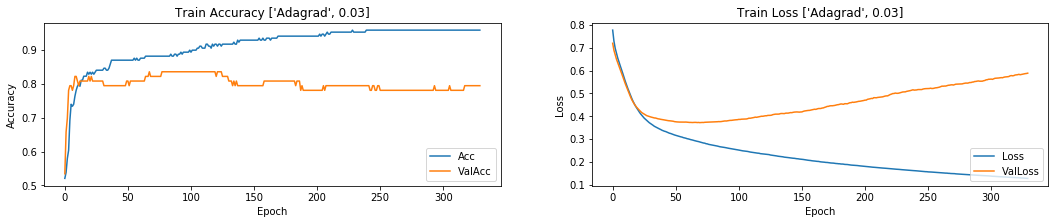

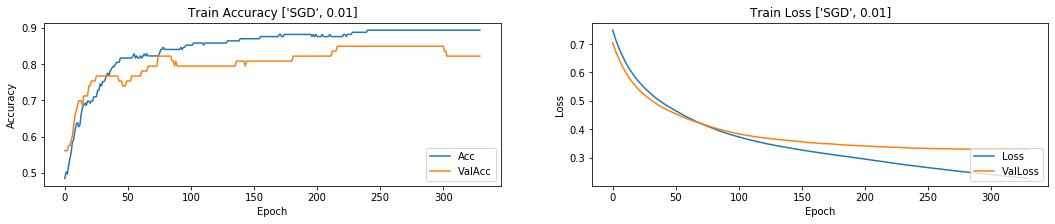

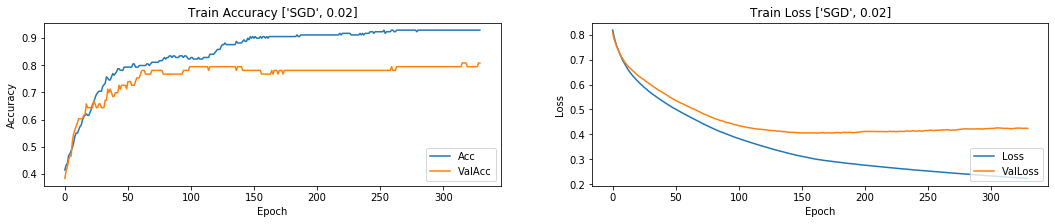

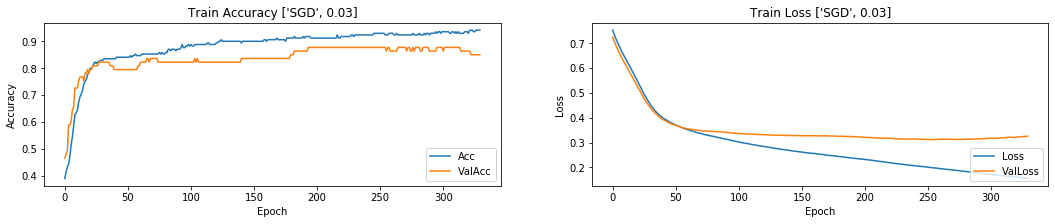

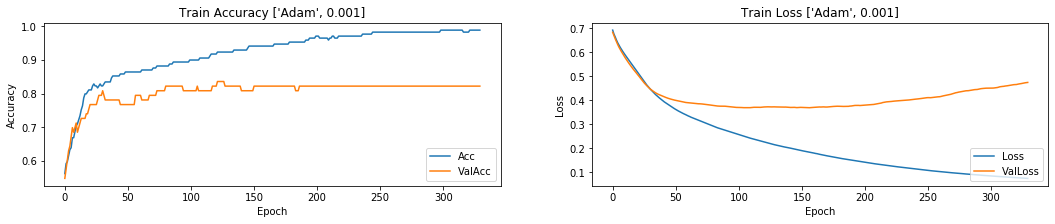

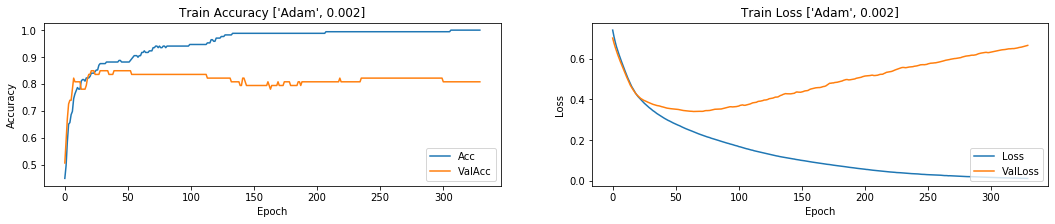

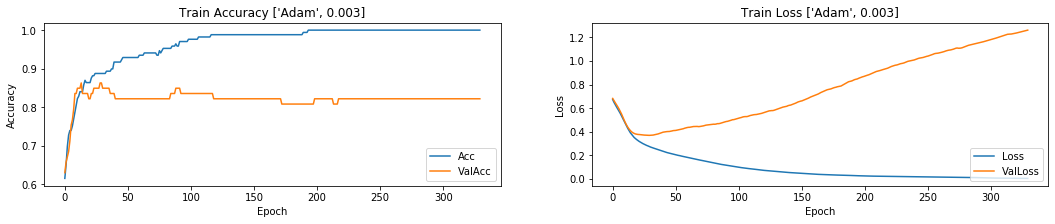

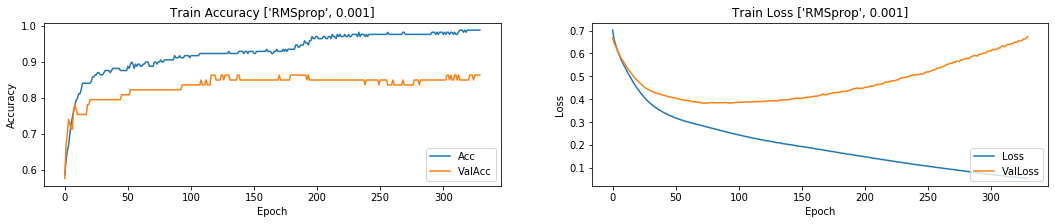

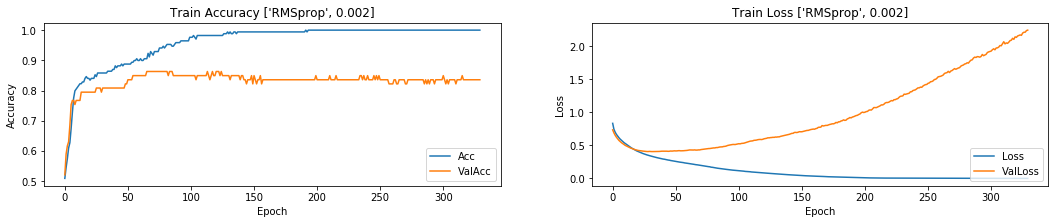

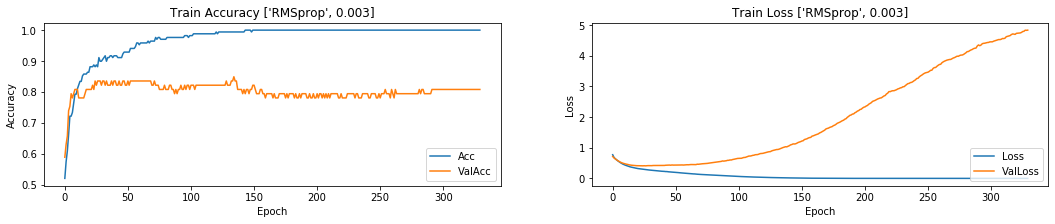

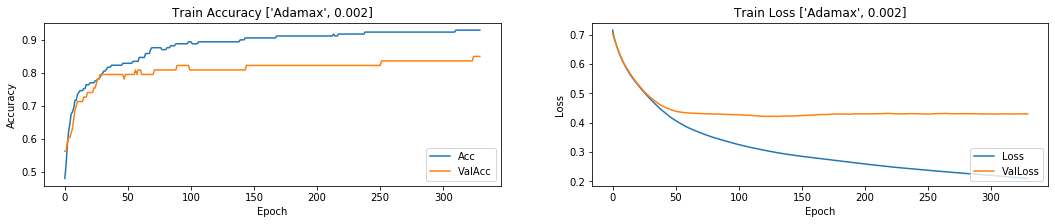

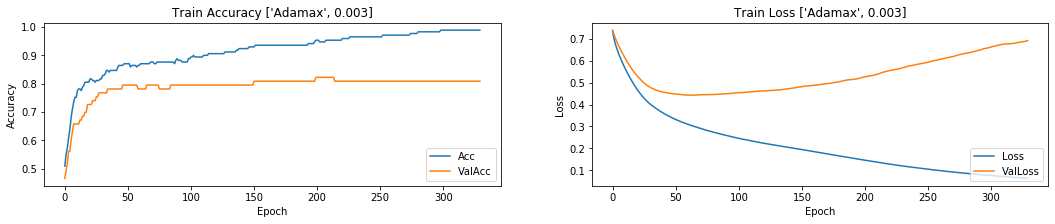

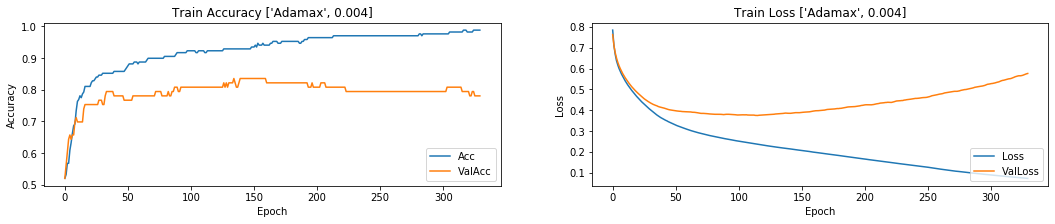

In [13]:
for i in range (len(optimizers_list)):
    a=[]
    for j in range (1,(len(optimizers_list[i]))):
        # Compiling the ANN
        classifier = Sequential()
        
        # Adding the input layer and the first hidden layer
        classifier.add(Dense(11, activation = 'relu', input_shape = (22,)))
        
        # Adding the second hidden layer
        classifier.add(Dense(11, activation = 'relu'))

        # Adding the output layer
        classifier.add(Dense(1, activation = 'sigmoid'))

        x = optimizers_list[i][0](lr=optimizers_list[i][j])
        classifier.compile(optimizer = x, loss = 'binary_crossentropy', metrics = ['accuracy'])

        start = time.time()
        test = classifier.fit(X_train, y_train, batch_size = 50, epochs = 330, validation_split=0.30, verbose=False)

        e=[optimizers_name[i],optimizers_list[i][j]]

        fig, ax = plt.subplots(1,2,figsize=(18,3))
        ax[0].plot(test.history['accuracy'])
        ax[0].plot(test.history['val_accuracy'])
        ax[0].set_title('Train Accuracy %s'%e)
        ax[0].set_ylabel('Accuracy')
        ax[0].set_xlabel('Epoch')
        ax[0].legend(['Acc', 'ValAcc'], loc='lower right')

        ax[1].plot(test.history['loss'])
        ax[1].plot(test.history['val_loss'])
        ax[1].set_title('Train Loss %s'%e)
        ax[1].set_ylabel('Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].legend(['Loss', 'ValLoss'], loc='lower right')

        a.append(e)
        a.append(time.time() - start)

        y_pred = classifier.predict(X_test)

        ac=accuracy_score(y_test, y_pred.round())
        print(e,'accuracy of the model: ',ac)

        a.append(ac)
    conclusion.append(a)
#print(conclusion)
